In [3]:
# 데이터셋 불러오기 
import pandas as pd
df = pd.read_csv('C:/Users/gills/Desktop/WorkSpace/Pandas/do_it_pandas-main/data/gapminder.tsv', sep = '\t') 
# import해서 판다스 불러오고 .read_csv로 해당 경로에 있는 파일 sep 구분자로 구분

In [4]:
# df의 타입 확인 -> 판다스의 데이터프레임 객체라는 것을 알 수 있음
print(type(df)) 

<class 'pandas.core.frame.DataFrame'>


In [7]:
# 데이터프레임 객체인 pandas.core.frame.DataFrame에 저장된 데이터셋은 shape 속성을 사용해 (행,열)의 개수를 확인 가능
# shape은 메서드가 아니기 때문에 () 사용하지 않음
print(df.shape)

(1704, 6)


In [8]:
# 같은 방법으로 columns 속성을 사용하면 데이터프레임 열의 이름 확인이 가능
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [9]:
#dtypes 속성으로 데이터셋의 각 열이 어떤 자료형인지 확인할 수 있음
print(df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [10]:
#다양한 정보를 함께 확인하고 싶다면 info() 메서드를 이용
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


In [11]:
# head() 메서드를 사용하면 가장 앞 5개의 행을 확인 가능
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
#문자열로 열 데이터 추출하기
# 불러온 데이터프레임 df에서 country의 열 데이터를 추출하고 그 결과를 country 변수에 저장
country = df['country']
print(country.head())
#마찬가지로 첫 5개의 행을 확인할 수 있다. 

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object


In [7]:
#tail() 메서드를 이용하면 마지막 5개의 행을 출력할 수 있다. 
print(country.tail())

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [8]:
#리스트 열 데이터 추출하기
# 바깥 대괄호는 열을 추출한다는 의미고, 안쪽 대괄호는 추출할 열 리스트이다.
res = df [['country', 'continent', 'year']]
res
#출력시 지정한 3개 열을 표시한다.
#df[0] -> x 대괄호 표기법은 열 이름이 아닌 열 위치를 전달하면 오류가 발생

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972
...,...,...,...
1699,Zimbabwe,Africa,1987
1700,Zimbabwe,Africa,1992
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002


In [10]:
# res = df[['country'], ['continent'], ['year']]  이건 안된다.
# res

InvalidIndexError: (['country'], ['continent'], ['year'])

In [11]:
#열 데이터 추출하는 2가지 방법의 차이점 이해하기
#시리즈 객체로 추출
country = df['country']
print(type(country))
# 열의 이름을 문자열로 지정하여 열데이터를 추출하면 시리즈 객체를 결과로 반환

<class 'pandas.core.series.Series'>


In [12]:
print(cou)

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object


In [14]:
#데이터 프레임 객체로 추출
country = df[['country']]
print(type(country))
# 보기와 같이 데이터프레임 객체임을 알 수 있다.
# 대괄호에 리스트를 전달하면 항상 DataFrame 객체를 반환

<class 'pandas.core.frame.DataFrame'>


In [15]:
# 열 데이터 추출 방법 2가지

print(df['country']) #대괄호 표기법
print(df.country)    #점 표기법

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object
0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object


 행 데이터 추출하기
 loc : 행 이름을 기준으로 행 추출 -> location의 줄임말
 iloc : 행 번호(행 위치)를 기준으로 행 추출 -> integer location의 줄임말
 인덱스를 따로 지정하지 않으면 판다스는 0부터 차례대로 행 번호를 매기고 이를 인덱스로 사용한다! 이때 행번호가 행 이름이 된다. 

In [16]:
print(df)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


In [17]:
# 출력 결과를 보면 데이터프레임 가장 왼쪽의 번호가 행 번호 임을 확인할 수 있다. 
# 이건 판다스가 자동으로 매긴 인덱스로 컬럼이 없는 행번호이자 이름이다. 

In [18]:
print(df.loc[0])
#인덱스 0에 해당하는 값을 출력

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object


In [19]:
print(df.loc[22])

country          Albania
continent         Europe
year                2002
lifeExp           75.651
pop              3508512
gdpPercap    4604.211737
Name: 22, dtype: object


In [20]:
print(df.loc[-1]) 
# 파이썬에서 리스트의 마지막 요소를 불러올 때 -1을 사용하는데 loc속성은 행이름을 참조한다. -1이라는 행이 없기 때문에 오류가 남

KeyError: -1

In [26]:
# loc로 마지막 행데이터 추출하기
print(df.shape[0]) # shape만 하게 되면 행과 열 개수 나오는데 [0] 첫번째 출력한 것으로 1704개 나온다.
number = df.shape[0] - 1 #열 이름까지 카운트 되기 때문에 -1가 마지막 행번호가 된다.
print(number)

1704
1703


In [27]:
print(df.loc[number])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [29]:
# 그냥 작성하는게 상황에 따라 더 빠를 수도 있다
print(df.loc[1703])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [31]:
# 행 데이터도 리스트를 사용해 여러 개 추출 가능
print(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [32]:
# 행 번호로 행데이터 추출
print(df.iloc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object


In [33]:
#행 번호로 출력하기 때문에 -1 사용이 가능하다
print(df.iloc[-1])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [34]:
print(df.iloc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [41]:
# loc로 행,열 데이터 추출하기
res = df.loc[:, ['year','pop']]
res

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460
...,...,...
1699,1987,9216418
1700,1992,10704340
1701,1997,11404948
1702,2002,11926563


In [43]:
res = df.iloc[:, [2, 4, -1]] # 항상 기억할 것은 열부분 3, 5, 마지막 부분 추출한다는 것 0이 1번이다
print(res)

      year       pop   gdpPercap
0     1952   8425333  779.445314
1     1957   9240934  820.853030
2     1962  10267083  853.100710
3     1967  11537966  836.197138
4     1972  13079460  739.981106
...    ...       ...         ...
1699  1987   9216418  706.157306
1700  1992  10704340  693.420786
1701  1997  11404948  792.449960
1702  2002  11926563  672.038623
1703  2007  12311143  469.709298

[1704 rows x 3 columns]


In [ ]:
# 기억해야할 것 loc는 행 이름으로 추출하고, iloc는 행 번호로 추출한다 
# loc 열에 숫자를 넣게 되면 오류가나고
# iloc 열에 열 이름을 넣게 되면 오류가 발생한다. 

In [44]:
#여러 행과 열 지정하여 데이터 추출하기
print(df.iloc[[0,5, 10],[0, 2, 4]])

        country  year       pop
0   Afghanistan  1952   8425333
5   Afghanistan  1977  14880372
10  Afghanistan  2002  25268405


In [45]:
print(df)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


In [46]:
print(df.loc[[0,5,10],['country', 'year', 'pop']])

        country  year       pop
0   Afghanistan  1952   8425333
5   Afghanistan  1977  14880372
10  Afghanistan  2002  25268405


In [ ]:
# loc를 하는게 더 좋아보이긴하다. 작성에는 iloc에 이점이 있는거 같지만
#직관적으로 무슨 열인지 바로 알 수 있고 열의 위치가 바꼈을 때 다른 열이 추출될 수 있다. 

In [47]:
#슬라이싱 구문 주의하기 
print(df.loc[10:13, :]) # 이름 기준으로 13 포함
print(df.iloc[10:13, :]) # 번호 기준으로 13제외 

        country continent  year  lifeExp       pop    gdpPercap
10  Afghanistan      Asia  2002   42.129  25268405   726.734055
11  Afghanistan      Asia  2007   43.828  31889923   974.580338
12      Albania    Europe  1952   55.230   1282697  1601.056136
13      Albania    Europe  1957   59.280   1476505  1942.284244
        country continent  year  lifeExp       pop    gdpPercap
10  Afghanistan      Asia  2002   42.129  25268405   726.734055
11  Afghanistan      Asia  2007   43.828  31889923   974.580338
12      Albania    Europe  1952   55.230   1282697  1601.056136


In [48]:
#기초 통계 계산하기
print(df)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


In [49]:
#데이터를 연도별 기대수명의 평균을 구해보자
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [50]:
# 2개 이상 열 그룹화하기
#year와 continent로 그룹화 하는데, 평균을 낼 항목은 lifeExp, gdpPercap인 것
print(df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean())

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [52]:
# 코드가 길어지면 \ 를 사용해 아래와 같은 식으로도 사용이 가능하다
print(df.groupby(['year','continent'])[['lifeExp','gdpPercap']]\
        .mean())

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [53]:
# 그룹화한 데이터 개수 세기 nunique() ->  중복을 제외한 개수  count
print(df.groupby('continent')['country'].nunique())
# 대륙별 국가의 중복되지 않은 개수를 확인할 수 있다. 

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


In [54]:
#value_counts()를 이용하면 빈도의 개수를 확인할 수 있다.
print(df.groupby('continent')['country'].value_counts())

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64


<Axes: xlabel='year'>

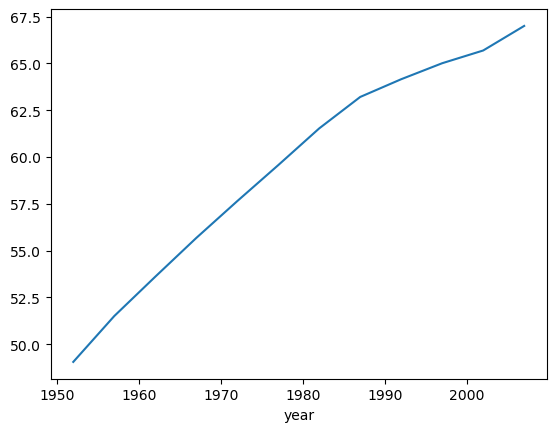

In [55]:
#데이터를 그래프로 표현하기
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
global_yearly_life_expectancy.plot()